(Mahotas) Otsu's threshold value 137
(OpenCV) Otsu's threshold value 137.0
Riddle-Calvard's threshold value 137.80118246864677


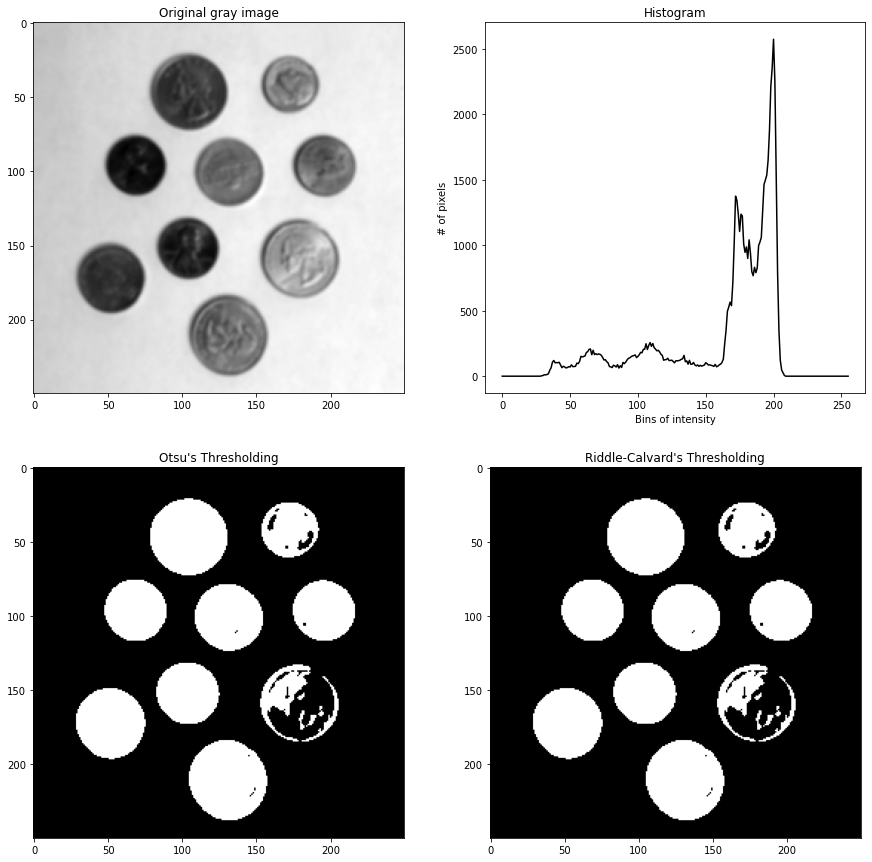

In [8]:
import cv2
import mahotas
from matplotlib import pyplot as plt

#Opean and Load image
path = r'images/coins.png'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Cretae gray image and blurred it!
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray,(5,5),0)

#Calculate histogram
hist = cv2.calcHist([blurred], [0], None, [256], [0, 256])

#Calculate thresholding using Otsu's method
T1 = mahotas.thresholding.otsu(blurred)
#cv2.threshold(imput_image, min, max, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
(T3, threshOtsu) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print("(Mahotas) Otsu's threshold value {}".format(T1))
print("(OpenCV) Otsu's threshold value {}".format(T3))
#(T1_value, threshOtsu) = cv2.threshold(blurred, int(T1), 255, cv2.THRESH_BINARY_INV)

#Calculate thresholding using RC's method
T2 = mahotas.thresholding.rc(blurred)
print("Riddle-Calvard's threshold value {}".format(T2))
(T2_value, threshRC) = cv2.threshold(blurred, int(T2), 255, cv2.THRESH_BINARY_INV)

#Plot image
fig1 = plt.figure(figsize=(15, 15))
##############ax1###################
ax1 = fig1.add_subplot(2,2,1)
ax1.set(title='Original gray image')
ax1.imshow(blurred, cmap='gray')
##############ax2###################
ax2 = fig1.add_subplot(2,2,2)
ax2.set(title='Histogram')
ax2.set_xlabel('Bins of intensity')
ax2.set_ylabel('# of pixels')
ax2.plot(hist, color='black')
##############ax3###################
ax3 = fig1.add_subplot(2,2,3)
ax3.set(title="Otsu's Thresholding")
ax3.imshow(threshOtsu, cmap='gray')
##############ax4###################
ax4 = fig1.add_subplot(2,2,4)
ax4.set(title="Riddle-Calvard's Thresholding")
ax4.imshow(threshRC, cmap='gray')